In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay

from sqliGoT import sqliGoT

In [2]:
df = pd.read_csv("./resource/Modified_SQL_Dataset.csv")

X = df['Query']
y = df['Label']

vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X_vectorized = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_sqliGoT = sqliGoT(X, windows_size = 5, type = "undirected", mode = "proportional")

X_sqliGoT = pd.DataFrame(X_sqliGoT).loc[:,(X_sqliGoT != 0).any(axis=0)]


100%|██████████| 30919/30919 [04:20<00:00, 118.72it/s]


In [3]:
X_vectorized_train, X_vectorized_test, y_vectorized_train, y_vectorized_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state=43192)
X_sqliGoT_train, X_sqliGoT_test, y_sqliGoT_train, y_sqliGoT_test = train_test_split(X_sqliGoT, y, test_size = 0.2, random_state=43192)

In [4]:
print("Vectorizer:")
print("X_train: ",X_vectorized_train.shape)
print("X_test: ",X_vectorized_test.shape)
print("sqliGoT:")
print("X_train: ",X_sqliGoT_train.shape)
print("X_test: ",X_sqliGoT_test.shape)

Vectorizer:
X_train:  (24735, 6594)
X_test:  (6184, 6594)
sqliGoT:
X_train:  (24735, 411)
X_test:  (6184, 411)


Accuracy= 0.9113842173350583
Precision= 0.8906595838866755
Recall= 0.8698659749243407
F1= 0.8801399825021873
Training Time: 9.296106100082397


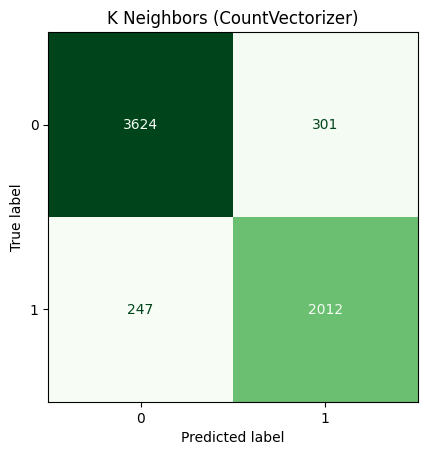

In [9]:
start_time = time.time()

knn_clf_vectorized = KNeighborsClassifier(n_neighbors=1, metric="minkowski", algorithm="brute")
knn_clf_vectorized.fit(X_vectorized_train, y_vectorized_train)
y_vectorized_pred = knn_clf_vectorized.predict(X_vectorized_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "K Neighbors (CountVectorizer)")
confusion = confusion_matrix(y_vectorized_test, y_vectorized_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Greens', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_vectorized_pred, y_vectorized_test))
print ("Precision=",precision_score(y_vectorized_pred, y_vectorized_test))
print ("Recall=",recall_score(y_vectorized_pred, y_vectorized_test))
print ("F1=",f1_score(y_vectorized_pred, y_vectorized_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.996280724450194
Precision= 0.9911465250110668
Recall= 0.9986619090098127
F1= 0.9948900244390135
Training Time: 2.450523614883423


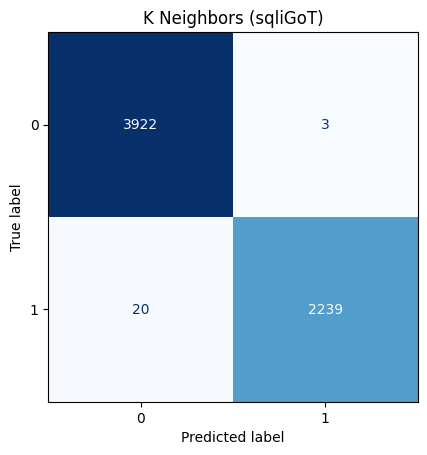

In [5]:
start_time = time.time()

knn_clf_sqliGoT = KNeighborsClassifier(n_neighbors=1, metric="minkowski", algorithm="brute")
knn_clf_sqliGoT.fit(X_sqliGoT_train, y_sqliGoT_train)
y_sqliGoT_pred = knn_clf_sqliGoT.predict(X_sqliGoT_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "K Neighbors (sqliGoT)")
confusion = confusion_matrix(y_sqliGoT_test, y_sqliGoT_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Blues', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Precision=",precision_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Recall=",recall_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("F1=",f1_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.9413001293661061
Precision= 0.8583444001770695
Recall= 0.9783047426841575
F1= 0.9144069794859704
Training Time: 5.862827301025391


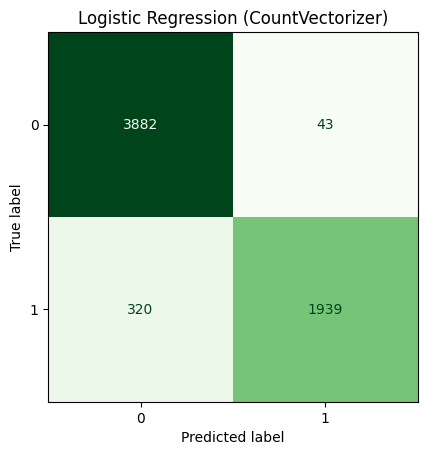

In [7]:
start_time = time.time()

lr_clf_vectorized = LogisticRegression(dual=False, C=1.0)
lr_clf_vectorized.fit(X_vectorized_train, y_vectorized_train)
y_vectorized_pred = lr_clf_vectorized.predict(X_vectorized_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Logistic Regression (CountVectorizer)")
confusion = confusion_matrix(y_vectorized_test, y_vectorized_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Greens', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_vectorized_pred, y_vectorized_test))
print ("Precision=",precision_score(y_vectorized_pred, y_vectorized_test))
print ("Recall=",recall_score(y_vectorized_pred, y_vectorized_test))
print ("F1=",f1_score(y_vectorized_pred, y_vectorized_test))
print ("Training Time:", end_time - start_time)

Accuracy= 0.9890038809831824
Precision= 0.9752102700309871
Recall= 0.9945823927765237
F1= 0.9848010728654447
Training Time: 0.6999380588531494


C:\Users\0123L\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


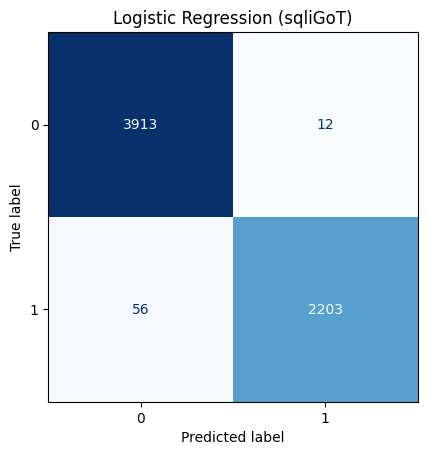

In [8]:
start_time = time.time()

lr_clf_sqliGoT = LogisticRegression(dual=False, C=1.0)
lr_clf_sqliGoT.fit(X_sqliGoT_train, y_sqliGoT_train)
y_sqliGoT_pred = lr_clf_sqliGoT.predict(X_sqliGoT_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Logistic Regression (sqliGoT)")
confusion = confusion_matrix(y_sqliGoT_test, y_sqliGoT_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Blues', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Precision=",precision_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Recall=",recall_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("F1=",f1_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.95003234152652
Precision= 0.8919876051350155
Recall= 0.96875
F1= 0.9287854344318968
Training Time: 1.2687101364135742


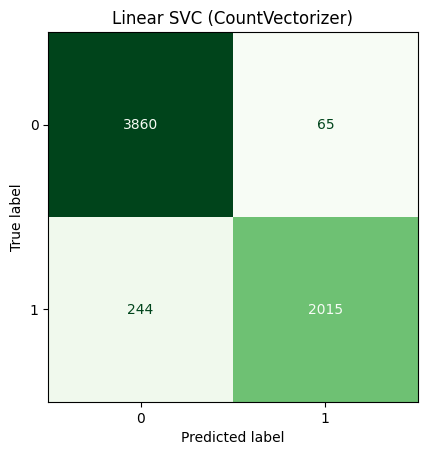

In [9]:
start_time = time.time()

lsvc_clf_vectorized = LinearSVC(dual=False, loss='squared_hinge', C=1.0)
lsvc_clf_vectorized.fit(X_vectorized_train, y_vectorized_train)
y_vectorized_pred = lsvc_clf_vectorized.predict(X_vectorized_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Linear SVC (CountVectorizer)")
confusion = confusion_matrix(y_vectorized_test, y_vectorized_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Greens', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_vectorized_pred, y_vectorized_test))
print ("Precision=",precision_score(y_vectorized_pred, y_vectorized_test))
print ("Recall=",recall_score(y_vectorized_pred, y_vectorized_test))
print ("F1=",f1_score(y_vectorized_pred, y_vectorized_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.990620957309185
Precision= 0.981850376272687
Recall= 0.992393736017897
F1= 0.9870939029817534
Training Time: 0.6195313930511475


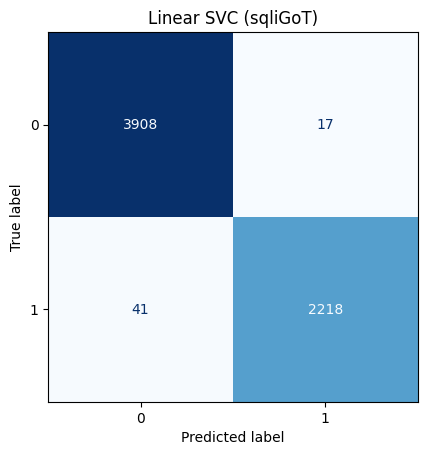

In [9]:
start_time = time.time()

lsvc_clf_sqliGoT = LinearSVC(dual=False, loss='squared_hinge', C=1.0)
lsvc_clf_sqliGoT.fit(X_sqliGoT_train, y_sqliGoT_train)
y_sqliGoT_pred = lsvc_clf_sqliGoT.predict(X_sqliGoT_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Linear SVC (sqliGoT)")
confusion = confusion_matrix(y_sqliGoT_test, y_sqliGoT_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Blues', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Precision=",precision_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Recall=",recall_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("F1=",f1_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.9511642949547219
Precision= 0.9043824701195219
Recall= 0.9596054485674025
F1= 0.9311759343664539
Training Time: 24806.51172685623


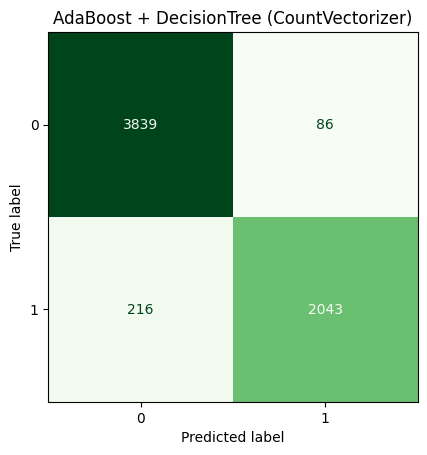

In [43]:
start_time = time.time()

ada_dt_clf_vectorized = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1), n_estimators=50)
ada_dt_clf_vectorized.fit(X_vectorized_train, y_vectorized_train)
y_vectorized_pred = ada_dt_clf_vectorized.predict(X_vectorized_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "AdaBoost + DecisionTree (CountVectorizer)")
confusion = confusion_matrix(y_vectorized_test, y_vectorized_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Greens', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_vectorized_pred, y_vectorized_test))
print ("Precision=",precision_score(y_vectorized_pred, y_vectorized_test))
print ("Recall=",recall_score(y_vectorized_pred, y_vectorized_test))
print ("F1=",f1_score(y_vectorized_pred, y_vectorized_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.9966041397153945
Precision= 0.9938025675077468
Recall= 0.9968916518650088
F1= 0.9953447129239636
Training Time: 20.24095320701599


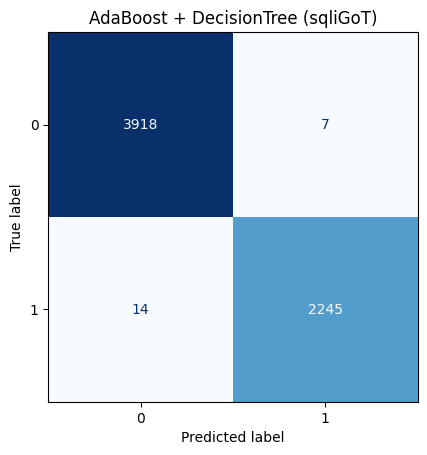

In [10]:
start_time = time.time()

ada_dt_clf_sqliGoT = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1), n_estimators=50)
ada_dt_clf_sqliGoT.fit(X_sqliGoT_train, y_sqliGoT_train)
y_sqliGoT_pred = ada_dt_clf_sqliGoT.predict(X_sqliGoT_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "AdaBoost + DecisionTree (sqliGoT)")
confusion = confusion_matrix(y_sqliGoT_test, y_sqliGoT_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Blues', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Precision=",precision_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Recall=",recall_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("F1=",f1_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.9425937904269082
Precision= 0.8955289951305887
Recall= 0.9444444444444444
F1= 0.9193365144285389
Training Time: 190.4859037399292


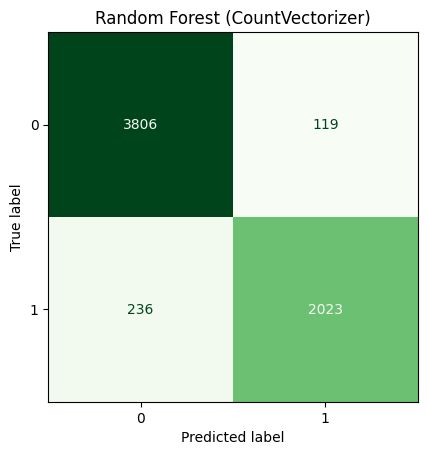

In [12]:
start_time = time.time()

rm_clf_vectorized = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1)
rm_clf_vectorized.fit(X_vectorized_train, y_vectorized_train)
y_vectorized_pred = rm_clf_vectorized.predict(X_vectorized_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Random Forest (CountVectorizer)")
confusion = confusion_matrix(y_vectorized_test, y_vectorized_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Greens', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_vectorized_pred, y_vectorized_test))
print ("Precision=",precision_score(y_vectorized_pred, y_vectorized_test))
print ("Recall=",recall_score(y_vectorized_pred, y_vectorized_test))
print ("F1=",f1_score(y_vectorized_pred, y_vectorized_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.9975743855109961
Precision= 0.9942452412571935
Recall= 0.9991103202846975
F1= 0.9966718437985356
Training Time: 2.8062915802001953


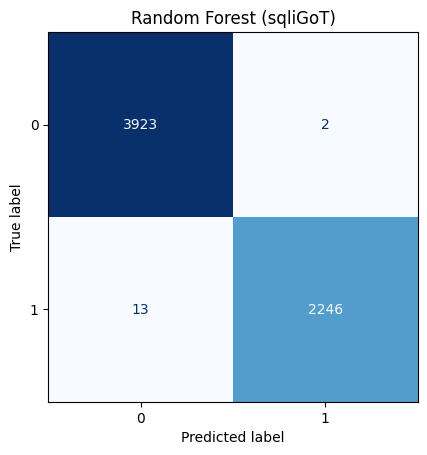

In [11]:
start_time = time.time()

rf_clf_sqliGoT = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1)
rf_clf_sqliGoT.fit(X_sqliGoT_train, y_sqliGoT_train)
y_sqliGoT_pred = rf_clf_sqliGoT.predict(X_sqliGoT_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Random Forest (sqliGoT)")
confusion = confusion_matrix(y_sqliGoT_test, y_sqliGoT_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Blues', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Precision=",precision_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Recall=",recall_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("F1=",f1_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.958764553686934
Precision= 0.9092518813634352
Recall= 0.9762357414448669
F1= 0.9415539766215907
Training Time: 2462.3280227184296


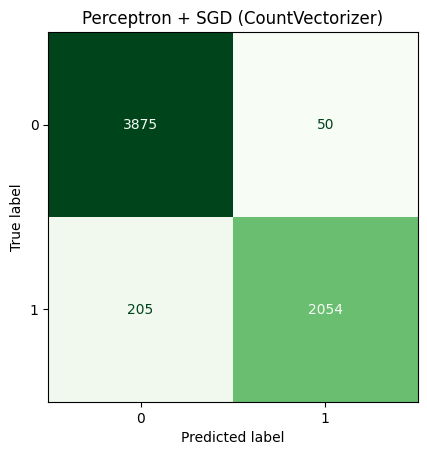

In [41]:
start_time = time.time()

mlp_sgd_clf_vectorized = MLPClassifier(hidden_layer_sizes=(200, 50), activation='relu', solver='sgd' , max_iter=1000)
mlp_sgd_clf_vectorized.fit(X_vectorized_train, y_vectorized_train)
y_vectorized_pred = mlp_sgd_clf_vectorized.predict(X_vectorized_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Perceptron + SGD (CountVectorizer)")
confusion = confusion_matrix(y_vectorized_test, y_vectorized_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Greens', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_vectorized_pred, y_vectorized_test))
print ("Precision=",precision_score(y_vectorized_pred, y_vectorized_test))
print ("Recall=",recall_score(y_vectorized_pred, y_vectorized_test))
print ("F1=",f1_score(y_vectorized_pred, y_vectorized_test))
print ("Training Time:", end_time - start_time)


Accuracy= 0.9959573091849935
Precision= 0.9898185037627268
Recall= 0.9991063449508489
F1= 0.9944407382699577
Training Time: 43.18609023094177


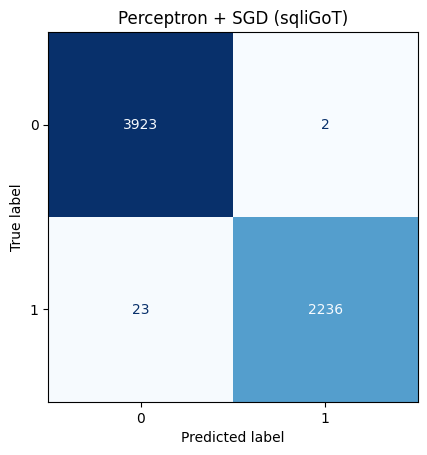

In [12]:
start_time = time.time()

mlp_sgd_clf_sqliGoT = MLPClassifier(hidden_layer_sizes=(200, 50), activation='relu', solver='sgd' , max_iter=1000)
mlp_sgd_clf_sqliGoT.fit(X_sqliGoT_train, y_sqliGoT_train)
y_sqliGoT_pred = mlp_sgd_clf_sqliGoT.predict(X_sqliGoT_test)

end_time = time.time()

ax = plt.figure().subplots()
ax.set(title = "Perceptron + SGD (sqliGoT)")
confusion = confusion_matrix(y_sqliGoT_test, y_sqliGoT_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=confusion).plot(cmap = 'Blues', colorbar=False, ax=ax)

print ("Accuracy=",accuracy_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Precision=",precision_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Recall=",recall_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("F1=",f1_score(y_sqliGoT_pred, y_sqliGoT_test))
print ("Training Time:", end_time - start_time)
